# **Import the Libraries:**

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from keras.utils import to_categorical

# **Import The Image data Generator**

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Confiqure Image Data Generator Class**

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# **Apply Image Data Generator Functionality To Trainset and Testset**

In [4]:
num_classes = 7; # 6 class labels + 1 unkown class 

In [5]:
x_train = train_datagen.flow_from_directory("F:/ClassificationOfArrythmia/ECG_Image_data/train",target_size = (64,64),
                                            batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory("F:/ClassificationOfArrythmia/ECG_Image_data/test",target_size = (64,64),
                                            batch_size = 32,class_mode = "categorical")

#, classes=["Left Bundle Branch Block","Normal","Premature Atrial Contraction", "Premature Ventricular Contraction","Right Bundle Branch Block", "Ventricular Fibrillation","Unknown"]

Found 105668 images belonging to 7 classes.
Found 28288 images belonging to 7 classes.


In [6]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contraction': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5,
 'z_Unknown': 6}

# **Adding CNN Layers:**


In [7]:
model = Sequential()


In [8]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))

In [9]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [10]:
model.add(Convolution2D(32,(3,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten()) # ANN Input...

# **Adding Dense Layers:**

In [13]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [14]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [15]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))


In [16]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [17]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

# **Adding Output Layer:**

In [18]:
model.add(Dense(units = num_classes,kernel_initializer = "random_uniform",activation = "softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# **Train the model:**


In [21]:
model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=9, validation_data=x_test,validation_steps = len(x_test))

C:\Users\dhamo\AppData\Local\Temp\ipykernel_12204\788911318.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=9, validation_data=x_test,validation_steps = len(x_test))


Epoch 1/9
3303/3303 [==============================] - 2460s 744ms/step - loss: 0.1451 - accuracy: 0.9554 - val_loss: 0.1959 - val_accuracy: 0.9426
Epoch 2/9
3303/3303 [==============================] - 2261s 685ms/step - loss: 0.0436 - accuracy: 0.9889 - val_loss: 0.0973 - val_accuracy: 0.9645
Epoch 3/9
3303/3303 [==============================] - 2395s 725ms/step - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.0081 - val_accuracy: 0.9981
Epoch 4/9
3303/3303 [==============================] - 2179s 660ms/step - loss: 0.0099 - accuracy: 0.9982 - val_loss: 0.0089 - val_accuracy: 0.9990
Epoch 5/9
3303/3303 [==============================] - 2271s 688ms/step - loss: 0.0124 - accuracy: 0.9976 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 6/9
3303/3303 [==============================] - 2396s 725ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 7/9
3303/3303 [==============================] - 2068s 626ms/step - loss: 0.0055 - accuracy: 0.9991 - val_

# **Save the model:**

In [22]:
#Saving Model.
model.save('ECG_CNN_Model.h5')

c:\Users\dhamo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Testing the model:**

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('ECG_CNN_Model.h5')

In [25]:
img=image.load_img("F:/ClassificationOfArrythmia/ECG_Image_data/test/Normal/M1.png",target_size=(64,64))

In [26]:
x=image.img_to_array(img) 

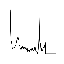

In [27]:
img

In [28]:
import numpy as np

In [29]:
x=np.expand_dims(x,axis=0)

In [30]:
pred = model.predict(x)
print("Pred = ",pred)
y_pred=np.argmax(pred)
y_pred

1/1 [==============================] - 0s 417ms/step
Pred =  [[0. 1. 0. 0. 0. 0. 0.]]


1

In [31]:
index=['Left Bundle Branch Block',
       'Normal',
       'Premature Atrial Contraction',
       'Premature Ventricular Contraction',
       'Right Bundle Branch Block',
       'Ventricular Fibrillation',
       'Unknown']


In [32]:

result = str(index[y_pred])
result

'Normal'